### Thailand Carbon Emissions datasets


Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Data cleaning and preparation for further investigation. There are three main sources that emitted carbon in this dataset, and each source used three different fuel types.

In [2]:
THemission = pd.read_csv('thailand_co2_emission_1987_2022.csv')
source = list(set(THemission['source']))
fuel_type = list(set(THemission['fuel_type']))
year = list(set(THemission['year']))
THemission = THemission.groupby(['source', 'fuel_type', 'year']).agg({'emissions_tons':np.sum})
THemission

/tmp/ipykernel_1376/2632257476.py:5: FutureWarning: The provided callable <function sum at 0x7fd1340fa560> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  THemission = THemission.groupby(['source', 'fuel_type', 'year']).agg({'emissions_tons':np.sum})


emissions_tons
source    fuel_type year                
industry  coal      1987         2940.05
                    1988         3593.42
                    1989         4815.14
                    1990         6156.96
                    1991         6895.67
...                                  ...
transport oil       2018        70501.87
                    2019        72557.22
                    2020        70918.22
                    2021        66876.69
                    2022        76974.46

[202 rows x 1 columns]

I used groupby by sources and fuel types, but each source and fuel type were stored in monthly data. I used aggregate to sum all carbon emissions in the year and then groupby years.

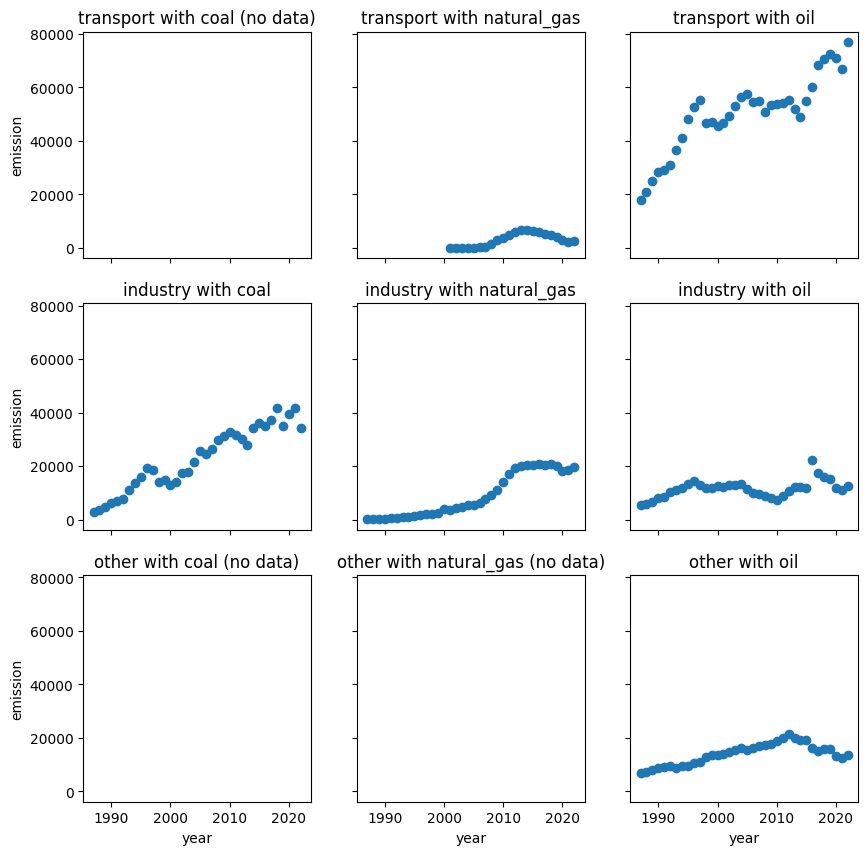

In [3]:
fig, ax =  plt.subplots(len(source), len(fuel_type), figsize=(10,10), sharey=True, sharex=True)
for i in range(len(source)):
    for j in range(len(fuel_type)):
        try:
            dd = THemission.loc[source[i],fuel_type[j]]
            ax[i,j].scatter(dd.index, dd['emissions_tons'])
            ax[i,j].title.set_text('{} with {}'.format(source[i],fuel_type[j]))
            if i == len(source)-1:
                ax[i,j].set_xlabel('year')
            if j == 0:
                ax[i,j].set_ylabel('emission')
        except:
            ax[i,j].title.set_text('{} with {} (no data)'.format(source[i],fuel_type[j]))
            if i == len(source)-1:
                ax[i,j].set_xlabel('year')
            if j == 0:
                ax[i,j].set_ylabel('emission')
            continue

In order to make visualization clean and plain, I used sharex and sharey so that yticks only show on the left most graphs and xticks only show on the lowermost graphs.
I used nested for loop to iterate through each row and column and plotted each graph. However, some data was missing and it couldn't be plotted, so I have to implement try and except to prevent missing data to go error. I also set x label on the lower most graphs and y label on the left most graphs by indicated row and column by i and j values.

## Discussion
The plots show that transportation using oil type fuel emitted the most carbon. In 2022, transportation using oil emitted almost 80,000 tons carbon equivalent. This is interesting, so I investigate deeper into carbon emission from transportation using oil.